In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train=pd.read_csv("train_data.txt",sep=":::",names=['Title','Genere','Description'],engine="python")

In [5]:
df_train

,Title,Genere,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genere       54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
df_train.describe()

,Title,Genere,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [8]:
df_train.isnull().sum()

Title          0
Genere         0
Description    0
dtype: int64

In [9]:
df_test=pd.read_csv("train_data.txt",sep=":::",names=['ID','Title','Description'],engine="python")

In [10]:
df_test

,ID,Title,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   Title        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Explore Data Analysis

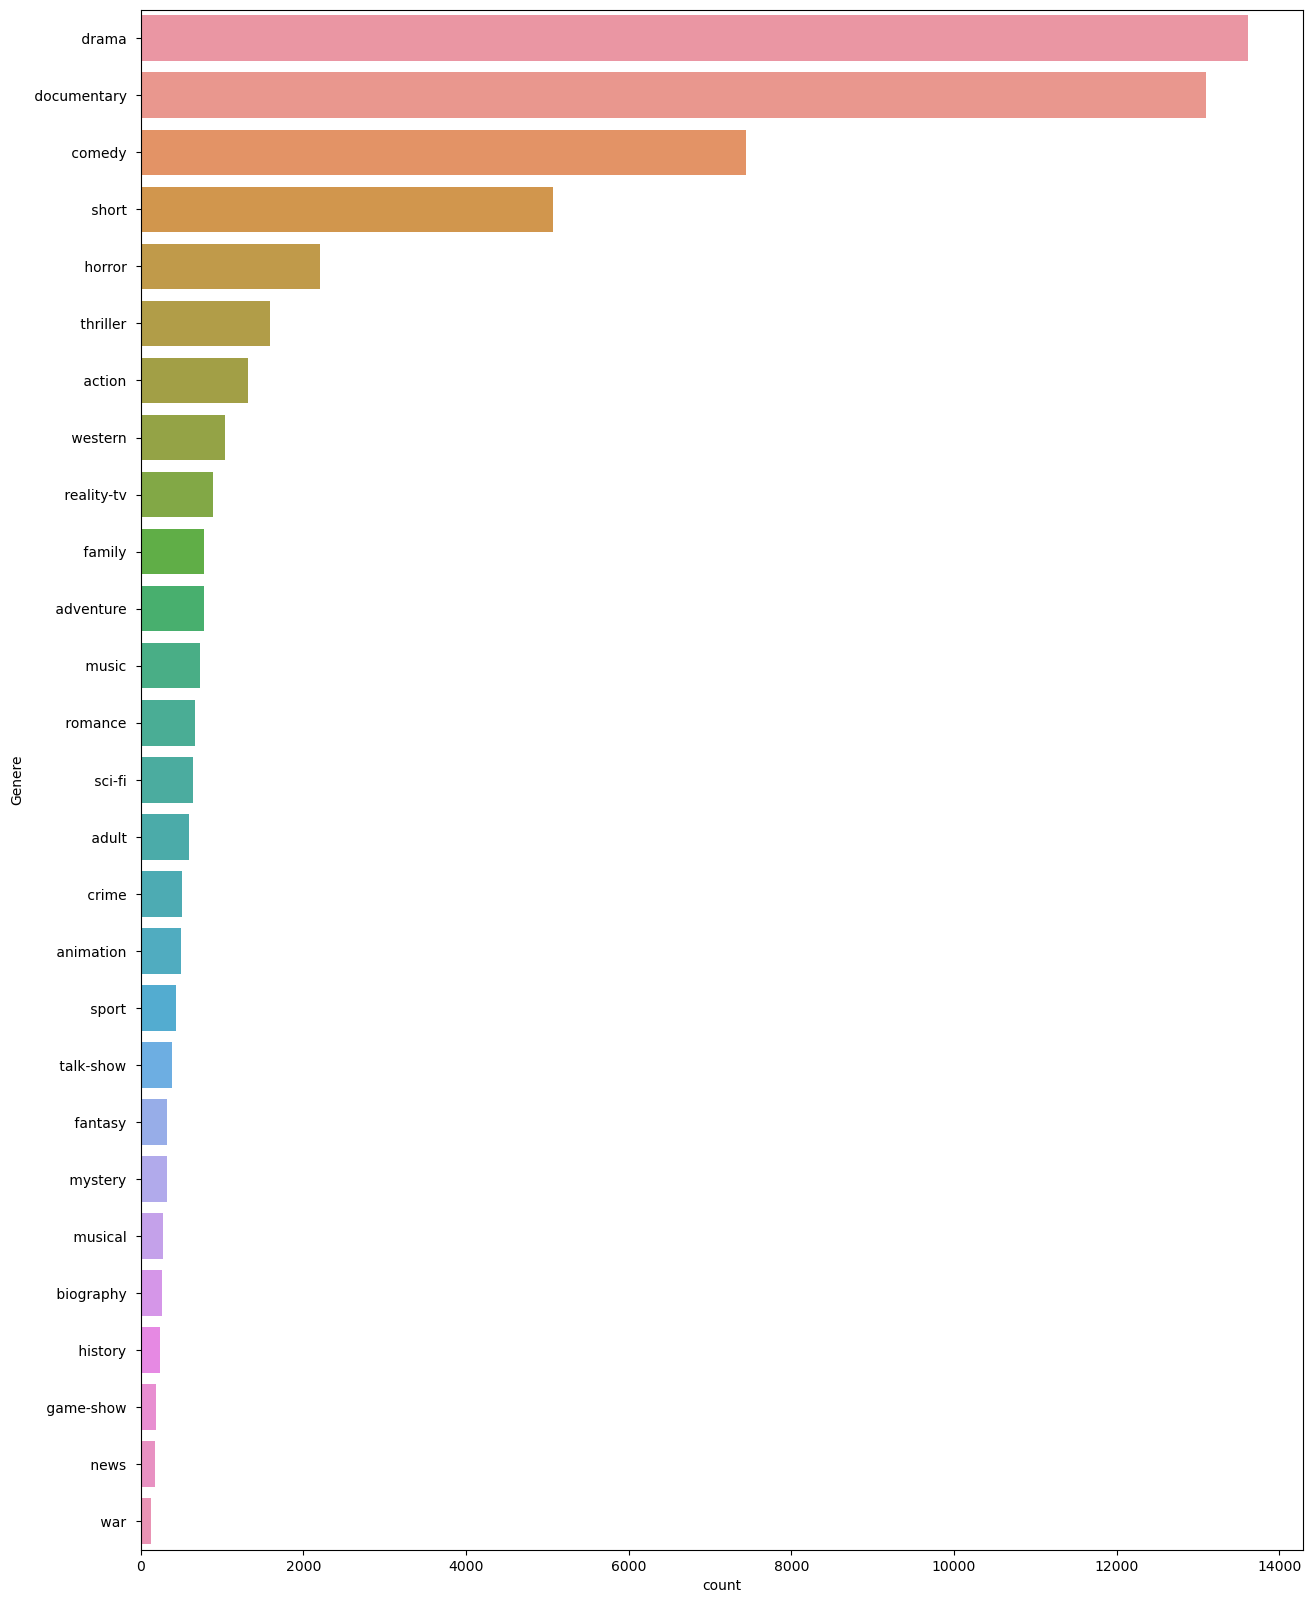

In [11]:
plt.figure(figsize=(15,20))
sns.countplot(data=df_train, y="Genere", order= df_train["Genere"].value_counts().index)
plt.show()

Data Preprocessing

In [12]:
import re  # used for pattern matching and text manipulation.
import string
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:

import nltk
nltk.download('stopwords')#for cleaning
nltk.download('punkt')
stemmer = LancasterStemmer() #stemmer: reduces word to its root word
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower() #lowercase for consistancy
    text = re.sub(r'@\S+', '', text)#removing mentions if any
    text = re.sub(r'http\S+', '', text)#removing links if any
    text = re.sub(r'.pic\S+', '', text)#removing images if any
    text = re.sub(r'[^a-zA-Z+]', ' ', text)#replace everything exceot words and numbers by white space
    text = "".join([i for i in text if i not in string.punctuation])#removing punctuation marks
    words = nltk.word_tokenize(text) # tokenizing text into words
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])#removes stops words and words less than length 3
    text = re.sub(r"\s+", " ", text).strip()#makes multiple spaces to single space and strips
    return text

df_train["TextCleaning"] = df_train["Description"].apply(cleaning_data)
df_test["TextCleaning"] = df_test["Description"].apply(cleaning_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vamsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vamsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df_train

,Title,Genere,Description,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


TF-IDF

In [14]:
#used for vectorizing data
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(df_train["TextCleaning"])

X_test = vectorize.transform(df_test["TextCleaning"])

In [15]:
X = X_train
y = df_train["Genere"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.1, random_state= 0)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Genere'] = le.fit_transform(df_train['Genere'].values)

train_data = df_train.loc[:,['TextCleaning', 'Genere']]
test_data = df_test.loc[:,['TextCleaning', 'Title']]
train_data.head(10)

,TextCleaning,Genere
1,listening conversation doctor parents year old...,8
2,brother sister past incestuous relationship cu...,24
3,bus empties students field trip museum natural...,1
4,help unemployed father make ends meet edith tw...,8
5,film title refers recovered bodies ground zero...,8
6,quality control consists series single take sh...,7
7,tough economic times max joey run ideas discov...,5
8,ron petrie keanu reeves troubled teen whose li...,6
9,sudden calamitous event causing great loss lif...,18
10,four high school students embark terrifying jo...,13


In [17]:
train_set , val_set , train_label , val_label = train_test_split(train_data['TextCleaning'] , train_data['Genere'] , test_size=0.2 , shuffle=True , random_state = 42)

print(f'Split data into train and eval sets')
print(f'Trani Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Split data into train and eval sets
Trani Set	: 43371
Validation Set	: 10843


In [18]:
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.54      0.21      0.30       263
           1       0.80      0.18      0.29       112
           2       0.48      0.10      0.17       139
           3       0.67      0.02      0.04       104
           4       0.00      0.00      0.00        61
           5       0.52      0.58      0.55      1443
           6       0.33      0.01      0.02       107
           7       0.64      0.86      0.74      2659
           8       0.53      0.81      0.64      2697
           9       0.42      0.05      0.09       150
          10       0.00      0.00      0.00        74
          11       0.92      0.30      0.45        40
          12       0.00      0.00      0.00        45
          13       0.68      0.56      0.62       431
          14       0.68      0.36      0.47       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

C:\Users\vamsi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vamsi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vamsi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [18]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

C:\Users\vamsi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.47      0.34      0.39       263
           1       0.72      0.44      0.54       112
           2       0.45      0.22      0.30       139
           3       0.43      0.14      0.22       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.29      0.05      0.08       107
           7       0.69      0.82      0.75      2659
           8       0.56      0.73      0.63      2697
           9       0.33      0.17      0.23       150
          10       0.18      0.04      0.07        74
          11       0.79      0.65      0.71        40
          12       0.50      0.02      0.04        45
          13       0.63      0.66      0.65       431
          14       0.61      0.56      0.58       144
          15       0.33      0.04      0.07        50
          16       0.25      0.04      0.06        56
          17       0.25    

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',random_state = 0)
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_rbf_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_rbf_accuracy*100))